In [1]:
# opencv-python
import cv2
# mediapipe人工智能工具包
import mediapipe as mp
# 进度条库
from tqdm import tqdm
# 时间库
import time
# 导入python绘图matplotlib
import matplotlib.pyplot as plt
# 使用ipython的魔法方法，将绘制出的图像直接嵌入在notebook单元格中
%matplotlib inline
import numpy as np

# 定义可视化图像函数


def look_img(img):
    # " ' opencv读入图像格式为BGR, matplotlib可视化格式为RGB,因此需将BGR转RGB''
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()

In [2]:
# 导入solution
mp_pose = mp.solutions.pose
# #导入绘图函数
mp_drawing = mp.solutions.drawing_utils

# 导入模型
pose = mp_pose.Pose(static_image_mode=True,
                    # 是静态图片还是连续视频帧
                    model_complexity=1,
                    # 选择人体姿态关键点检测模型，0性能差但快，2性能好但慢，1介于两者之间
                    smooth_landmarks=True,
                    # 是否平滑关键点
                    enable_segmentation=True,
                    # 是否人体抠图
                    min_detection_confidence=0.5,  # 置信度阈值
                    min_tracking_confidence=0.5)  # 追踪阈值

In [3]:
# 从图片文件读入图像，opencv读入为BGR格式
img = cv2.imread('./1.jpg')
# look_img(img)

# BGR转RGB
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 将RGB图像输入模型,获取预测结果
results = pose.process(img_RGB)

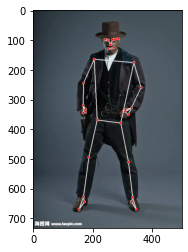

In [4]:
mp_drawing.draw_landmarks(img, results.pose_landmarks,
                          mp_pose.POSE_CONNECTIONS)
look_img(img)

### 获取左膝盖关键点像素坐标

In [5]:
h = img.shape[0]
w = img.shape[1]

# 非空，则证明检测出来了
results.pose_landmarks

landmark {
  x: 0.5204854607582092
  y: 0.1585105061531067
  z: -0.650888204574585
  visibility: 0.999987006187439
}
landmark {
  x: 0.5355038642883301
  y: 0.1363551914691925
  z: -0.6269369125366211
  visibility: 0.9999663829803467
}
landmark {
  x: 0.5462486743927002
  y: 0.13446128368377686
  z: -0.6269598007202148
  visibility: 0.9999672174453735
}
landmark {
  x: 0.5566611289978027
  y: 0.13257825374603271
  z: -0.6268338561058044
  visibility: 0.999964714050293
}
landmark {
  x: 0.5057963728904724
  y: 0.13812893629074097
  z: -0.6078726053237915
  visibility: 0.999962329864502
}
landmark {
  x: 0.4960857033729553
  y: 0.1376042664051056
  z: -0.6079391241073608
  visibility: 0.9999580383300781
}
landmark {
  x: 0.48699259757995605
  y: 0.13709530234336853
  z: -0.6079397201538086
  visibility: 0.999953031539917
}
landmark {
  x: 0.5749611258506775
  y: 0.1318049132823944
  z: -0.3904934525489807
  visibility: 0.999954104423523
}
landmark {
  x: 0.4846521019935608
  y: 0.1359854

In [6]:
# 左膝盖关键点像素坐标
cx = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE].x*w)
cy = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE].y*h)
cz = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE].z

print(cx, cy, cz)

320 510 0.1359492689371109


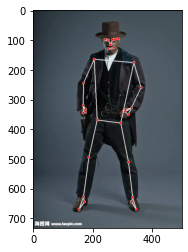

In [7]:
# 绘制圆:图像，圆心坐标，半径，BGR颜色， 最后一个参数为线宽，-1表示填充
# img = cv2.circle(img,(cx,cy),15, (255,0,0), -1)

look_img(img)

In [8]:
# 可视化关键点及骨架连线
mp_drawing.draw_landmarks(img, results.pose_landmarks,
                          mp_pose.POSE_CONNECTIONS)
for i in range(33):  # 遍历33个关键点
    # 获取该关键点的三维坐标
    cx = int(results.pose_landmarks.landmark[i].x*w)
    cy = int(results.pose_landmarks.landmark[i].y * h)
    cz = results.pose_landmarks.landmark[i].z
    radius = 5

    if i == 0:  # 鼻尖
        img = cv2.circle(img, (cx, cy), radius, (0, 0, 255), -1)
    elif i in [11, 12]:  # 肩膀
        img = cv2.circle(img, (cx, cy), radius, (223, 155, 6), -1)
    elif i in [23, 24]:  # 髋关节
        img = cv2.circle(img, (cx, cy), radius, (1, 240, 255), -1)
    elif i in [13, 14]:  # 胳膊肘
        img = cv2.circle(img, (cx, cy), radius, (140, 47, 240), -1)
    elif i in [25, 26]:  # 膝盖
        img = cv2 .circle(img, (cx, cy), radius, (0, 0, 255), -1)
    elif i in [15, 16, 27, 28]:  # 手腕和脚腕
        img = cv2.circle(img, (cx, cy), radius, (223, 155, 60), -1)
    elif i in [17, 19, 21]:  # 左手
        img = cv2.circle(img, (cx, cy), radius, (94, 218, 121), -1)
    elif i in [18, 20, 22]:  # 右手
        img = cv2.circle(img, (cx, cy), radius, (16, 144, 247), -1)
    elif i in [27, 29, 31]:  # 左脚
        img = cv2.circle(img, (cx, cy), radius, (29, 123, 243), -1)
    elif i in [28, 30, 32]:  # 右脚
        img = cv2.circle(img, (cx, cy), radius, (193, 182, 255), -1)
    elif i in [9, 10]:  # 嘴
        img = cv2.circle(img, (cx, cy), radius, (205, 235, 255), -1)
    elif i in [1, 2, 3, 4, 5, 6, 7, 8]:  # 眼及脸颊
        img = cv2.circle(img, (cx, cy), radius, (94, 218, 121), -1)
    else:  # 其它关键点
        img = cv2.circle(img, (cx, cy), radius, (0, 255, 0), -1)

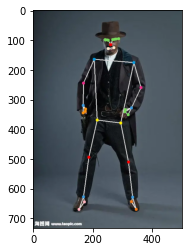

In [9]:
look_img(img)